# LendingClub Loan Default Prediction - EDA & Data Cleaning

## Objective
This notebook focuses on exploratory data analysis and initial data cleaning of the LendingClub dataset.

## Steps
1. Load and understand the data
2. Analyze the target variable (`loan_status`)
3. Handle missing values
4. Initial data cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

## 📁 Data Loading Strategy

**Using:** `accepted_2007_to_2018Q4.csv` (approved loans)
**Not using:** `rejected_2007_to_2018Q4.csv` (rejected applications)

**Why only accepted loans?**
- Contains actual loan outcomes (Fully Paid/Charged Off)
- Has complete repayment history for modeling
- Rejected loans lack the target variable we want to predict

**Why sampling?**  
Loading 50,000 rows for faster development while preserving data patterns.

In [2]:
# Load the ACCEPTED loans dataset (using sample for faster testing)
try:
    df = pd.read_csv('../data/raw/accepted_2007_to_2018Q4.csv', nrows=50000)
    print("Loaded sample of 50,000 ACCEPTED loans for development")
except:
    df = pd.read_csv('../data/raw/accepted_2007_to_2018Q4.csv')
    print("Loaded full ACCEPTED loans dataset")

print(f"Data Shape: {df.shape}")

Loaded sample of 50,000 ACCEPTED loans for development
Data Shape: (50000, 151)


In [4]:
# See data types and missing values
print("Data Types and Non-Null Counts:")
df.info(verbose=True, show_counts=True)

print("\nFirst 5 Rows:")
df.head()

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 151 columns):
 #    Column                                      Non-Null Count  Dtype  
---   ------                                      --------------  -----  
 0    id                                          50000 non-null  int64  
 1    member_id                                   0 non-null      float64
 2    loan_amnt                                   50000 non-null  float64
 3    funded_amnt                                 50000 non-null  float64
 4    funded_amnt_inv                             50000 non-null  float64
 5    term                                        50000 non-null  object 
 6    int_rate                                    50000 non-null  float64
 7    installment                                 50000 non-null  float64
 8    grade                                       50000 non-null  object 
 9    sub_grade                             

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Loan Status Distribution:
loan_status
Fully Paid            34978
Charged Off            9027
Current                5610
Late (31-120 days)      246
In Grace Period         100
Late (16-30 days)        38
Default                   1
Name: count, dtype: int64


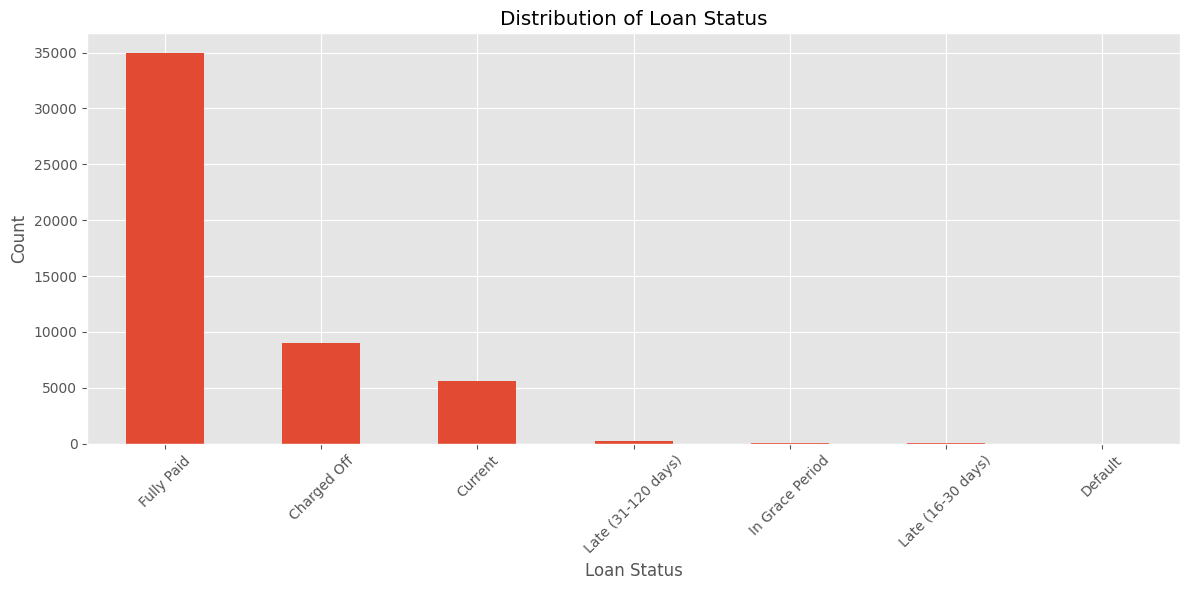

In [6]:
# Check different loan statuses
print("Loan Status Distribution:")
loan_status_counts = df['loan_status'].value_counts()
print(loan_status_counts)

# Plot loan status distribution
plt.figure(figsize=(12, 6))
loan_status_counts.plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Original shape: (44005, 152)
Shape after filtering: (44005, 152)

Class Balance:
Fully Paid (0): 79.49%
Charged Off (1): 20.51%


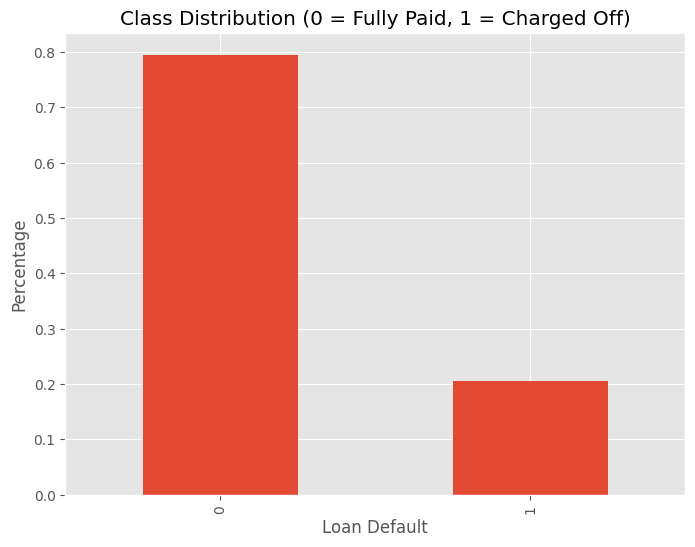

In [8]:
# Keep only Fully Paid and Charged Off loans
print(f"Original shape: {df.shape}")
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
print(f"Shape after filtering: {df.shape}")

# Create target variable: 1 for default, 0 for paid
df['loan_default'] = (df['loan_status'] == 'Charged Off').astype(int)

# Check class balance
class_balance = df['loan_default'].value_counts(normalize=True)
print("\nClass Balance:")
print(f"Fully Paid (0): {class_balance[0]:.2%}")
print(f"Charged Off (1): {class_balance[1]:.2%}")

# Plot class distribution
plt.figure(figsize=(8, 6))
class_balance.plot(kind='bar')
plt.title('Class Distribution (0 = Fully Paid, 1 = Charged Off)')
plt.xlabel('Loan Default')
plt.ylabel('Percentage')
plt.show()

Columns with Missing Values:
member_id                                     100.000000
sec_app_collections_12_mths_ex_med            100.000000
sec_app_chargeoff_within_12_mths              100.000000
sec_app_num_rev_accts                         100.000000
sec_app_open_act_il                           100.000000
sec_app_revol_util                            100.000000
sec_app_open_acc                              100.000000
next_pymnt_d                                  100.000000
sec_app_mths_since_last_major_derog           100.000000
sec_app_earliest_cr_line                      100.000000
sec_app_inq_last_6mths                        100.000000
revol_bal_joint                               100.000000
sec_app_fico_range_low                        100.000000
sec_app_mort_acc                              100.000000
sec_app_fico_range_high                       100.000000
desc                                           99.993183
verification_status_joint                      99.586411
dt

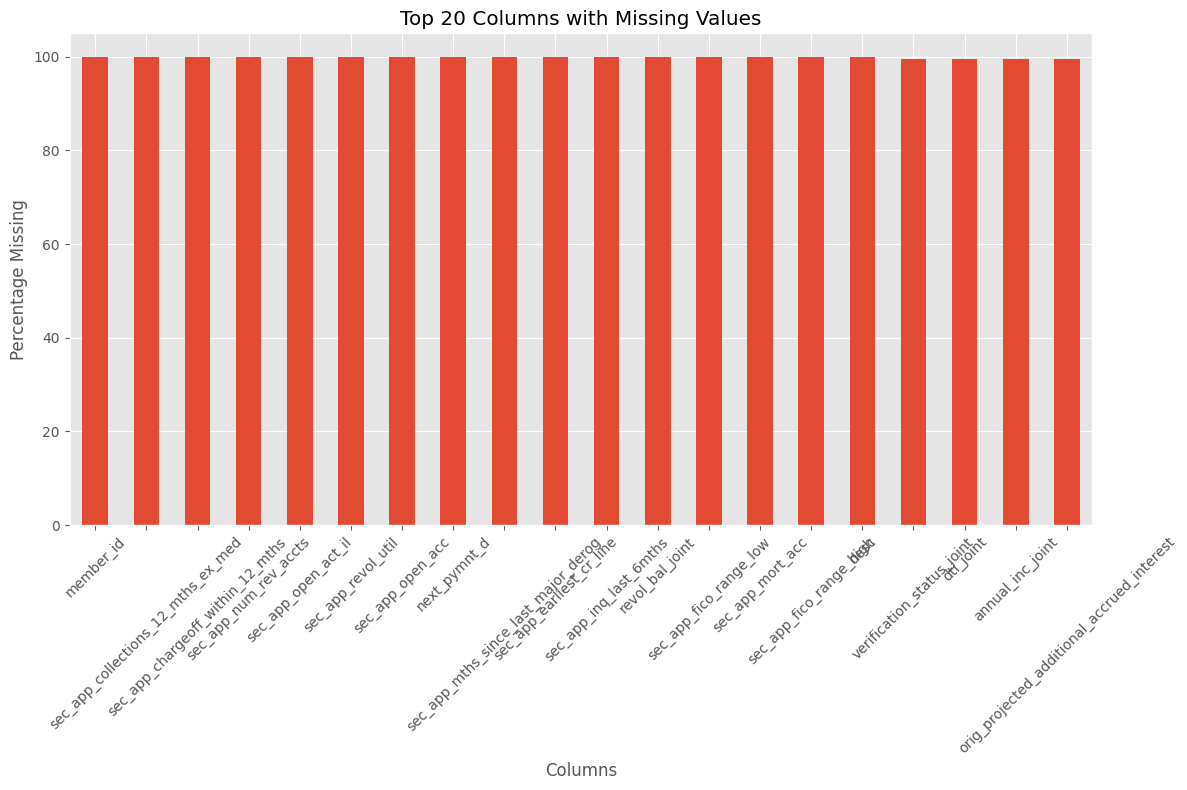

In [10]:
# Find columns with missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)

print("Columns with Missing Values:")
print(missing_percentage[missing_percentage > 0].head(20))

# Plot top 20 columns with missing values
plt.figure(figsize=(12, 8))
missing_percentage[missing_percentage > 0].head(20).plot(kind='bar')
plt.title('Top 20 Columns with Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index.tolist()
print(f"Dropping {len(columns_to_drop)} columns with >50% missing values")
print(columns_to_drop)

df_clean = df.drop(columns=columns_to_drop)
print(f"Shape after dropping high-missing columns: {df_clean.shape}")

# Save cleaned data
df_clean.to_csv('../data/processed/01_cleaned_data.csv', index=False)
print("Cleaned data saved to '../data/processed/01_cleaned_data.csv'")

Dropping 57 columns with >50% missing values
['member_id', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_revol_util', 'sec_app_open_acc', 'next_pymnt_d', 'sec_app_mths_since_last_major_derog', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_mort_acc', 'sec_app_fico_range_high', 'desc', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'orig_projected_additional_accrued_interest', 'hardship_type', 'hardship_status', 'hardship_payoff_balance_amount', 'hardship_start_date', 'hardship_loan_status', 'payment_plan_start_date', 'hardship_dpd', 'hardship_reason', 'hardship_end_date', 'hardship_amount', 'hardship_last_payment_amount', 'hardship_length', 'deferral_term', 'settlement_status', 'settlement_percentage', 'debt_settlement_flag_date', 'settlement_amount', 'settlement_term', 'settlement_date', 'mths_since_last_record', 'mths_since_r

In [12]:
# Show basic statistics for numerical columns
print("Basic Statistics for Numerical Columns:")
df_clean.describe().T.head(10)

Basic Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
id,44005.0,6.671651e+07,1.966279e+06,67025.00,65954749.00,66545046.00,67456065.00,68617057.00
loan_amnt,44005.0,1.432505e+04,8.619771e+03,1000.00,7700.00,12000.00,20000.00,35000.00
funded_amnt,44005.0,1.432505e+04,8.619771e+03,1000.00,7700.00,12000.00,20000.00,35000.00
funded_amnt_inv,44005.0,1.431791e+04,8.614855e+03,950.00,7700.00,12000.00,20000.00,35000.00
int_rate,44005.0,1.199266e+01,4.186314e+00,5.32,9.17,11.49,14.48,28.99
installment,44005.0,4.288574e+02,2.548260e+02,14.77,244.22,369.22,571.88,1354.66
annual_inc,44005.0,7.848109e+04,1.023894e+05,0.00,47000.00,65000.00,94000.00,9000000.00
dti,44004.0,1.908450e+01,9.914473e+00,0.00,12.42,18.53,25.31,999.00
delinq_2yrs,44005.0,3.468242e-01,9.182171e-01,0.00,0.00,0.00,0.00,15.00
fico_range_low,44005.0,6.943492e+02,3.118995e+01,660.00,670.00,685.00,710.00,845.00
